In [1]:
from math import *
import fractions as fra
from numpy.linalg import det, inv
import numpy as np
from sympy.abc import *
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from sympy.interactive.printing import init_printing
from matplotlib.animation import PillowWriter

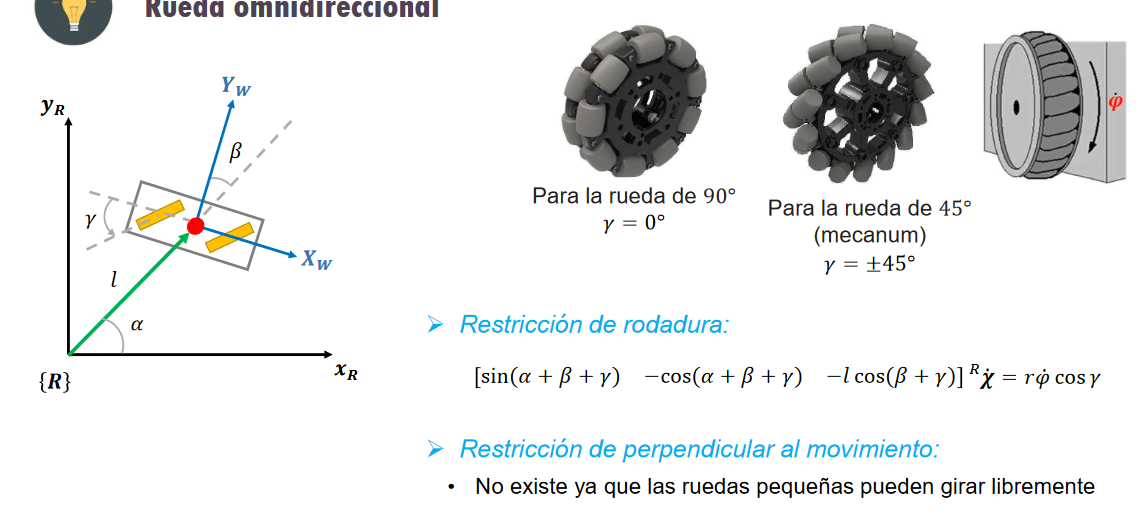

In [2]:
#Definimos las variables, en la ecuación de eslabon se necesitan estas funciones
a1, a2, a3= smp.symbols("a_1, a_2, a_3")
b1, b2, b3= smp.symbols("b_1, b_2, b_3")
g1, g2, g3= smp.symbols("g_1, g_2, g_3")
L,r, t=smp.symbols(" L r t")
rx = smp.symbols("X_rd")
psi=smp.symbols(r"\psi_d")
psi1, psi2, psi3=smp.symbols(r"\psi_1, \psi_2, \psi_3")
vpsi1, vpsi2, vpsi3=smp.symbols(r"\vpsi_1, v\psi_2, v\psi_3")
vx, vy, vthe= smp.symbols(r"vx, vy, v\theta_1")
vthe

v\theta_1

In [3]:
#Lo único que se está haciendo es definir los valores de cada ángulo
#Para un ángulo alpha de 90 grados no se tiene gamma y bajo las consideraciones actuales no tenemos betta
a1, a2, a3= 60*np.pi/180, 180*np.pi/180, -60*np.pi/180
b1, b2, b3= 0,0,0
g1, g2, g3= 0,0,0

In [4]:
#Se está escribiendo la representación de cada elemento de la matriz de forma simbólica
A1=[smp.sin(a1+b1+g1),-smp.cos(a1+b1+g1),-L*smp.cos(b1+g1)]
A2=[smp.sin(a2+b2+g2),-smp.cos(a2+b2+g2),-L*smp.cos(b2+g2)]
A3=[smp.sin(a3+b3+g3),-smp.cos(a3+b3+g3),-L*smp.cos(b3+g3)]


In [5]:
#se está generando la matriz con todas las variables, notese que al evaluar el elemento 2,1 no da cero como tal, pero sí un valor muy cercano a este
#se podría hacer un comando smp.nsimplify a cada elemento para obtenerlo en fracción y raíz, pero al trabajar con este se llegan a obtener ecuaciones con demasiados decimales
#lo que hace que sea muy molesto de ver
A=smp.Matrix([[smp.sin(a1+b1+g1),-smp.cos(a1+b1+g1),-L*smp.cos(b1+g1)],
              [smp.sin(a2+b2+g2),-smp.cos(a2+b2+g2),-L*smp.cos(b2+g2)],
              [smp.sin(a3+b3+g3),-smp.cos(a3+b3+g3),-L*smp.cos(b3+g3)]])

A

Matrix([
[   0.866025403784439, -0.5, -L],
[1.22464679914735e-16,  1.0, -L],
[  -0.866025403784439, -0.5, -L]])

In [6]:
#se esta obteniendo la inversa de A
Ai=A.inv()
Ai
smp.nsimplify(Ai)

Matrix([
[288675134594813/500000000000000,        0, -288675134594813/500000000000000],
[                           -1/3,      2/3,                             -1/3],
[                       -1/(3*L), -1/(3*L),                         -1/(3*L)]])

In [7]:
#se está generando una matriz que contenga todos los elementos de las velocidades para aplicar el método directo
rx=smp.Matrix([[vx],[vy],[vthe]])
rx

Matrix([
[       vx],
[       vy],
[v\theta_1]])

In [8]:
#se esta generando una matríz de R, pero en realidad no es necesaria. Simplemente es una demostración de como se puede generar esta
R=smp.Matrix.ones(3,3)*r
R

Matrix([
[r, r, r],
[r, r, r],
[r, r, r]])

In [9]:
#Se plantéan las variables a usar para la parte angular o rotacional
psi=smp.Matrix([[psi1],[psi2],[psi3]])

psi=smp.transpose(psi)
psi

Matrix([[\psi_1, \psi_2, \psi_3]])

In [10]:
#más adelante se mostratá como obtener los valores de cada matriz correspondiente para su multiplicación, según sea la deseada. 
#El método de esta celda es solo como es la idea especfífica para cierto elemento, donde se pregunta el primer elemento hasta el último sin tomarlo
#matlab no toma el último elemento escrito y empieza en 0
Ai1=smp.Matrix(Ai[0:3])*r
R1=R[0:3]
print(Ai1,R1)

Matrix([[0.577350269189626*r], [0], [-0.577350269189626*r]]) [r, r, r]


In [11]:
Ai2=smp.Matrix(Ai[3:6])*r
R2=R[3:6]
print(Ai2,R2)

Matrix([[-0.333333333333333*r], [0.666666666666667*r], [-0.333333333333333*r]]) [r, r, r]


In [12]:
Ai3=smp.Matrix(Ai[6:9])*r
R3=R[6:9]
print(Ai3,R3)

Matrix([[-0.333333333333333*r/L], [-0.333333333333333*r/L], [-0.333333333333333*r/L]]) [r, r, r]


In [13]:
#aquí se despliegan las velocidades según se quiera obtener lo que se necesite, más adelante se muestra la función global
vx=smp.nsimplify(psi*Ai1*smp.cos(g1))
vx

Matrix([[288675134594813*\psi_1*r/500000000000000 - 288675134594813*\psi_3*r/500000000000000]])

In [14]:
vy=smp.nsimplify(psi*Ai2*smp.cos(g2))
vy

Matrix([[-\psi_1*r/3 + 2*\psi_2*r/3 - \psi_3*r/3]])

In [15]:
vthe=smp.nsimplify(psi*Ai3)
vthe

Matrix([[-\psi_1*r/(3*L) - \psi_2*r/(3*L) - \psi_3*r/(3*L)]])

In [16]:
#función de velocidades para la cinemática directa
def VED(velocidadD,ElementoI,ElementoF,gamma):

  velocidadD=smp.nsimplify(psi*smp.Matrix(Ai[ElementoI:ElementoF])*r)*smp.cos(gamma)

  return velocidadD

In [17]:
#Demostración de uso
VED(vx,0,3,g1)
VED(vy,3,6,g2)
VED(vthe,6,9,g3)

Matrix([[r*(-\psi_1/(3*L) - \psi_2/(3*L) - \psi_3/(3*L))]])

In [27]:
#Matriz de velocidad directas
def MVD():
  
  MVD=smp.Matrix([[VED(vx,0,3,g1)],[VED(vy,3,6,g2)],[VED(vthe,6,9,g3)]])
  return MVD

In [29]:
#la primera linea es una aproximación a los valores reales sin necesidad de aproximar
MVD()

Matrix([
[r*(288675134594813*\psi_1/500000000000000 - 288675134594813*\psi_3/500000000000000)],
[                                              r*(-\psi_1/3 + 2*\psi_2/3 - \psi_3/3)],
[                                    r*(-\psi_1/(3*L) - \psi_2/(3*L) - \psi_3/(3*L))]])

In [20]:
#función de velocidad para cada elemento del método indirecto
def VEI(velocidadI,ElementoI,ElementoF,gamma):
  velocidadI=smp.Transpose(smp.Matrix(A[ElementoI:ElementoF]))*(1/r)*rx*(1*smp.cos(gamma))
  return velocidadI

In [21]:
#Demostración
VEI(vpsi1,0,3,g1)
VEI(vpsi2,3,6,g2)
VEI(vpsi3,6,9,g3)

1/r*Matrix([[-L*v\theta_1 - 0.866025403784439*vx - 0.5*vy]])

In [22]:
#Matriz de velocidades indirectas
def MVI():
  
  MVI=smp.nsimplify(smp.Matrix([[VEI(vpsi1,0,3,g1)],[VEI(vpsi2,3,6,g2)],[VEI(vpsi3,6,9,g3)]]))
  return MVI

In [23]:
#La  matriz debería de conten un cero para el elemento 2,2. El problema es que el sin(180) es aproximado a cero
#A fin de cuentas llega a ser un valor muy despreciable
MVI()

Matrix([
[           1/r*Matrix([[-L*v\theta_1 + 866025403784439*vx/1000000000000000 - vy/2]])],
[1/r*Matrix([[-L*v\theta_1 + 24492935982947*vx/200000000000000000000000000000 + vy]])],
[           1/r*Matrix([[-L*v\theta_1 - 866025403784439*vx/1000000000000000 - vy/2]])]])

In [24]:
#Demostación de lo comentado, se podría intentar con math.sin, sin, np.sin o pandas. El resultado llega a lo mismo
#Es cierto que desde un principio se pudieron plantear las funciones directas, pero el fin es hacerlo de una manera más explicativa
#No todas las paqueterías se usaron, ya que tomé como base otro documento.
#Es muy importante el especificar que se está trabajando con matrices, python debe de saberlo no lo intuye.
smp.nsimplify(sin(-180))

80115263573383/100000000000000

# Se tendría lo necesario para modelarse en Vpython, pero se omitirá por el simple hecho de no ser el motivo principal. Esta herramienta 3D se puede utilizar para obtener y mapear información a tiempo real. En este mismo se puede trabajar con objetos 3D y asignarles sus propiedades físicas. Existen varios ejemplo, el que yo recomiendo es el péndulo 2 con movimiento en tres dimensiones de MPsolver. Desde el comienzo se tomó en cuenta considerar los ángulos variables, ya que se aprecia mejor el simbólo de derivada respecto el tiempo, o notación punto.

